# Multiple Linear Regression

## Introduction
In MLR, we can use both quantitative and categorical x-variabes to predict a quantitative response. Using notation, it would be something like this:

$$\hat{y} = b_0 + b_1x_1 + b_2x_2 + b_3x_3 + b_4x_4$$

Free supplementary book: [Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20First%20Printing.pdf). While the programming performed in the book is in R, some [redditors](https://www.reddit.com/r/learnpython/comments/6rkh3u/introduction_to_statistical_learning_with_python/) provided Jupyter Notebooks in Python with notes and answers to nearly all questions from the book. 

In order to understand MLR, one needs a firm grasp on linear algebra. 

Some free resources to help out:
- [Khan Academy's free course on Linear Algebra](https://www.khanacademy.org/math/linear-algebra)
- [Khan Academy's Linear Matrix free course](https://www.khanacademy.org/math/precalculus/x9e81a4f98389efdf:matrices/x9e81a4f98389efdf:mat-intro/v/introduction-to-the-matrix)
- [NumPy help](https://www.w3schools.com/python/numpy/numpy_intro.asp)

## Fitting a Multiple Linear Regression Model

1. Create an intercept
2. Use statsmodels.api library, as in the previous lesson, but in the x portion add all of the quantitative variables (adding categorical variables will cause an error).
3. Fit the model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = pd.read_csv('support-files/15_MLR/house_prices.csv')
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


`1.` Using statsmodels, fit three individual simple linear regression models to predict price.  You should have a model that uses **area**, another using **bedrooms**, and a final one using **bathrooms**.  You will also want to use an intercept in each of your three models.

Use the results from each of your models to answer the first two quiz questions below.

In [2]:
# linear model using area to predict price
df['intercept'] = 1
lm_area = sm.OLS(df['price'], df[['intercept', 'area']])
results_area = lm_area.fit()
results_area.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                 1.269e+04
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:30:14   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6026   BIC:                         1.691e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9587.8878   7637.479      1.255      0.209   -5384.303    2.46e+04
area         348.4664      3.093    112.662      0.000     342.403     354.530
==============================================================================
Omnibus:                      368.609   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.279
Skew:                           0.534   Prob(JB):                     1.43e-76
Kurtosis:                       2.499   Cond. No.                     4.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [3]:
# linear model using # of bedrooms to predict price
lm_bed = sm.OLS(df['price'], df[['intercept', 'bedrooms']])
results_bed = lm_bed.fit()
results_bed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     7446.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:30:14   Log-Likelihood:                -85509.
No. Observations:                6028   AIC:                         1.710e+05
Df Residuals:                    6026   BIC:                         1.710e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -9.485e+04   1.08e+04     -8.762      0.000   -1.16e+05   -7.36e+04
bedrooms    2.284e+05   2646.744     86.289      0.000    2.23e+05    2.34e+05
==============================================================================
Omnibus:                      967.118   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1599.431
Skew:                           1.074   Prob(JB):                         0.00
Kurtosis:                       4.325   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
# linear model using # of bathrooms to predict price
lm_bath = sm.OLS(df['price'], df[['intercept', 'bathrooms']])
results_bath = lm_bath.fit()
results_bath.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     7116.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:30:14   Log-Likelihood:                -85583.
No. Observations:                6028   AIC:                         1.712e+05
Df Residuals:                    6026   BIC:                         1.712e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.314e+04   9587.189      4.500      0.000    2.43e+04    6.19e+04
bathrooms   3.295e+05   3905.540     84.358      0.000    3.22e+05    3.37e+05
==============================================================================
Omnibus:                      915.429   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1537.531
Skew:                           1.010   Prob(JB):                         0.00
Kurtosis:                       4.428   Cond. No.                         5.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`2.` Now that you have looked at the results from the simple linear regression models, let's try a multiple linear regression model using all three of these variables  at the same time.  You will still want an intercept in this model.

In [5]:
mlm = sm.OLS(df['price'], df[['intercept', 'area', 'bedrooms', 'bathrooms']])
results = mlm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:30:14   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
area         345.9110      7.227     47.863      0.000     331.743     360.079
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

`3.` Along with using the **area**, **bedrooms**, and **bathrooms** you might also want to use **style** to predict the price.  Try adding this to your multiple linear regression model.  What happens?  Use the final quiz below to provide your answer.

In [6]:
# mlm_style = sm.OLS(df['price'], df[['intercept', 'area', 'bedrooms', 'bathrooms', 'style']])
# results_style = mlm_style.fit()
# results_style.summary()

# trying to fit categorical variables directly into the model won't work!

## Dummy Variables: Adding Categorical Variables
The way that we add categorical variables into our multiple linear regression models is by using dummy variables. The most common way dummy variables are added is through 1, 0 encoding. In this encoding method, you create a new column for each level of a category (in this case A, B, or C). Then our new columns either hold a 1 or 0 depending on the presence of the level in the original column.

When we add these dummy variables to our multiple linear regression models, we always drop one of the columns. The column you drop is called the baseline. The coefficients you obtain from the output of your multiple linear regression models are then an indication of how the encoded levels compare to the baseline level (the dropped level).

There is a lot of math behind dummy varaibles, but the takeway is **when you create dummy variables using 0, 1 encodings, you always need to drop one of the columns from the model to make sure your matrices are full rank (and that your solutions are reliable from Python).**

The reason for this is linear algebra. Specifically, in order to invert matrices, a matrix must be full rank (that is, all the columns need to be linearly independent). Therefore, you need to drop one of the dummy columns, to create linearly independent columns (and a full rank matrix).

### Creating Dummy Variables
To create dummy variables, you can use the Pandas method pd.get_dummies(). The documentation for this method can be found [HERE](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html).

The pd.get_dummies() method:

1. Takes in a categorical column
2. Creates a new column for each categorical value (in alphabetical order) and assigns values of either 1 or 0, to the rows

When using dummy variables in our model—

- Always drop the baseline category, one of the encoded columns (which column does not matter)
- The intercept coefficient will be the prediction on the baseline category
- The remaining coefficients are comparisons to the baseline category

### Quiz

`1.` Use the [pd.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) documentation to assist you with obtaining dummy variables for the **neighborhood** column.  Then use [join](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) to add the dummy variables to your dataframe, **df**, and store the joined results in **df_new**.

Fit a linear model using **all three levels** of **neighborhood** to predict the price. Don't forget an intercept.

In [7]:
neighborhood_dummies = pd.get_dummies(df['neighborhood'])
df_new = df.join(neighborhood_dummies)
df_new.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,intercept,A,B,C
0,1112,B,1188,3,2,ranch,598291,1,0,1,0
1,491,B,3512,5,3,victorian,1744259,1,0,1,0
2,5952,B,1134,3,2,ranch,571669,1,0,1,0
3,3525,A,1940,4,2,ranch,493675,1,1,0,0
4,5108,B,2208,6,4,victorian,1101539,1,0,1,0


In [8]:
# I didn't create an intercept column because I already added one to this dataset
# on a previous exercise!


# using ALL three levels
mlm_nei = sm.OLS(df_new['price'], df_new[['intercept', 'A', 'B', 'C']])
results_nei = mlm_nei.fit()
results_nei.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     983.1
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:30:15   Log-Likelihood:                -87082.
No. Observations:                6028   AIC:                         1.742e+05
Df Residuals:                    6025   BIC:                         1.742e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.381e+05   4439.653    121.210      0.000    5.29e+05    5.47e+05
A           3001.8311   8650.726      0.347      0.729    -1.4e+04       2e+04
B           5.325e+05   7894.313     67.448      0.000    5.17e+05    5.48e+05
C           2669.4717   8925.271      0.299      0.765   -1.48e+04    2.02e+04
==============================================================================
Omnibus:                      689.315   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1154.155
Skew:                           0.793   Prob(JB):                    2.39e-251
Kurtosis:                       4.442   Cond. No.                     2.41e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.39e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

`2.`  Now, fit an appropriate linear model for using **neighborhood** to predict the price of a home. Use **neighborhood A** as your baseline. (And remember that the values shown in the results for the other neighborhoods will be based on comparisons with this baseline neighborhood A then.)

In [9]:
lm = sm.OLS(df_new['price'], df_new[['intercept', 'B', 'C']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     983.1
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:30:15   Log-Likelihood:                -87082.
No. Observations:                6028   AIC:                         1.742e+05
Df Residuals:                    6025   BIC:                         1.742e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.411e+05   1.05e+04     51.537      0.000    5.21e+05    5.62e+05
B           5.295e+05    1.4e+04     37.870      0.000    5.02e+05    5.57e+05
C           -332.3594   1.52e+04     -0.022      0.983   -3.01e+04    2.94e+04
==============================================================================
Omnibus:                      689.315   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1154.155
Skew:                           0.793   Prob(JB):                    2.39e-251
Kurtosis:                       4.442   Cond. No.                         3.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Each of the coefficients is a comparison of the category to the baseline. Therefore, a positive coefficient suggests the neighborhood is more expensive on average than the baseline. Alternatively, a negative coefficient suggests that the neighborhood is less expensive on average than the baseline.

In this example, therefore, neighborhood B is the MOST expensive, neighborhood A (baseline/intercept) is the second most expensive, and neighborhood C is the least expensive. 

Checking the p-values, we know that there is statistically significant evidence that the average home price in NB differs from the average home price in NA. This is possible because NA is our baseline.

Checking the confidence interval, we also know that there is statistically significant evidence that the average home price in NB differs from the average home price in NC. Their intervals don't overlap!

`3.` Plot the distribution of each neighborhood in a histogram. This creates a glimpse into the differences that you found in the previous linear model.

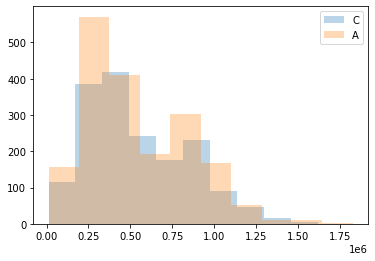

In [10]:
plt.hist(df_new.query("C == 1")['price'], alpha = 0.3, label = 'C');
plt.hist(df_new.query("A == 1")['price'], alpha = 0.3, label = 'A');

plt.legend();

Neighborhoods C and A have somewhat similar prices, as they mostly overlap in the above histogram. When we add Neighborhood B, on the other hand, it is clear B is the most expensive one, as the histogram below shows.

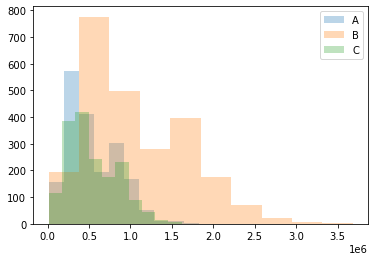

In [11]:
plt.hist(df_new.query("A == 1")['price'], alpha = 0.3, label = 'A')
plt.hist(df_new.query("B == 1")['price'], alpha = 0.3, label = 'B')
plt.hist(df_new.query("C == 1")['price'], alpha = 0.3, label = 'C')

plt.legend();

`4.` Now, add dummy variables for the **style** of house. Create a new linear model using these new dummies, as well as the previous **neighborhood** dummies.  Use **ranch** as the baseline for the **style**.  Additionally, add **bathrooms** and **bedrooms** to your linear model. **Home prices are measured in dollars, and this dataset is not real.**

In [12]:
df['style'].unique()

array(['ranch', 'victorian', 'lodge'], dtype=object)

In [13]:
style_dummies = pd.get_dummies(df['style'])
df_new = df_new.join(style_dummies)
df_new.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,intercept,A,B,C,lodge,ranch,victorian
0,1112,B,1188,3,2,ranch,598291,1,0,1,0,0,1,0
1,491,B,3512,5,3,victorian,1744259,1,0,1,0,0,0,1
2,5952,B,1134,3,2,ranch,571669,1,0,1,0,0,1,0
3,3525,A,1940,4,2,ranch,493675,1,1,0,0,0,1,0
4,5108,B,2208,6,4,victorian,1101539,1,0,1,0,0,0,1


In [14]:
lm = sm.OLS(df_new['price'], df_new[['intercept', 'lodge', 'victorian', 'bathrooms', 'bedrooms', 'B', 'C']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     4250.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:30:16   Log-Likelihood:                -82944.
No. Observations:                6028   AIC:                         1.659e+05
Df Residuals:                    6021   BIC:                         1.659e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3.833e+05    1.2e+04    -31.995      0.000   -4.07e+05    -3.6e+05
lodge       1.685e+05   9906.629     17.012      0.000    1.49e+05    1.88e+05
victorian   7.056e+04   8337.790      8.463      0.000    5.42e+04    8.69e+04
bathrooms   9.996e+04   1.09e+04      9.164      0.000    7.86e+04    1.21e+05
bedrooms    1.732e+05   7677.152     22.558      0.000    1.58e+05    1.88e+05
B           5.229e+05   7040.928     74.271      0.000    5.09e+05    5.37e+05
C          -7168.6285   7639.254     -0.938      0.348   -2.21e+04    7807.045
==============================================================================
Omnibus:                      978.611   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2926.472
Skew:                           0.848   Prob(JB):                         0.00
Kurtosis:                       5.962   Cond. No.                         25.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Remember that e+04 means that you move the decimal from its current location four spots to the right.

## Other Encodings: 1, 0, -1

In [15]:
## The below function creates 1, 0, -1 coded dummy variables.

def dummy_cat(df, col):
    '''
    INPUT:
    df - the dataframe where col is stored
    col - the categorical column you want to dummy (as a string)
    OUTPUT:
    df - the dataframe with the added columns
         for dummy variables using 1, 0, -1 coding
    '''
    for idx, val_0 in enumerate(df[col].unique()):
        if idx + 1 < df[col].nunique():            
            df[val_0] = df[col].apply(lambda x: 1 if x == val_0 else 0)
        else:    
            df[val_0] = df[col].apply(lambda x: -1 if x == val_0 else 0)
            for idx, val_1 in enumerate(df[col].unique()):
                if idx + 1 < df[col].nunique():
                    df[val_1] = df[val_0] + df[val_1]
                else:
                    del df[val_1]
    return df

In [16]:
new_df = dummy_cat(df, 'style') # Use on style
new_df.head(10)

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,intercept,ranch,victorian
0,1112,B,1188,3,2,ranch,598291,1,1,0
1,491,B,3512,5,3,victorian,1744259,1,0,1
2,5952,B,1134,3,2,ranch,571669,1,1,0
3,3525,A,1940,4,2,ranch,493675,1,1,0
4,5108,B,2208,6,4,victorian,1101539,1,0,1
5,7507,C,1785,4,2,lodge,455235,1,-1,-1
6,4964,B,2996,5,3,victorian,1489871,1,0,1
7,7627,C,3263,5,3,victorian,821931,1,0,1
8,6571,A,1159,3,2,ranch,299903,1,1,0
9,5220,A,1248,3,2,victorian,321975,1,0,1


In [17]:
# using 1, 0, -1 encoding

new_df['intercept'] = 1

lm = sm.OLS(new_df['price'], new_df[['intercept', 'ranch', 'victorian']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     1548.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:30:16   Log-Likelihood:                -86683.
No. Observations:                6028   AIC:                         1.734e+05
Df Residuals:                    6025   BIC:                         1.734e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.421e+05   5854.251    109.677      0.000    6.31e+05    6.54e+05
ranch      -6.695e+04   8233.489     -8.131      0.000   -8.31e+04   -5.08e+04
victorian    4.04e+05   7377.372     54.763      0.000     3.9e+05    4.18e+05
==============================================================================
Omnibus:                     1340.120   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3232.810
Skew:                           1.230   Prob(JB):                         0.00
Kurtosis:                       5.611   Cond. No.                         1.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpretation:

- 1, 0 coding means a comparison to the baseline category. 
- 1, 0, -1 coding means a comparison to the overall average.
- 33.9% of the variability in price can be explained by the home style.
- 642100 is the predicted average home price regardless of home style.
- As compared to the average home, we predict the price of a victorian home to be 404000 greater, holding all variables constant. 
- As compared to the average home, we predict the price of a ranch home to be 66950 less, holding all variables constant.
- In order to predict the baseline category in the 1, 0 coding, you use the intercept. In the 1, 0, -1 coding, you need to multiply each categorical coefficient by -1 to get at the missing category. With this in mind, the predicted average price for lodges using the 1, 0, -1 coding model is:

In [18]:
lodge = (642100) + (-66950*-1) + (404000*-1)
lodge

305050

Does 305050 match with the results from 0, 1 encoding?

In [19]:
# using 0, 1 encoding

lm = sm.OLS(df_new['price'], df_new[['intercept', 'ranch', 'victorian']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     1548.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:30:17   Log-Likelihood:                -86683.
No. Observations:                6028   AIC:                         1.734e+05
Df Residuals:                    6025   BIC:                         1.734e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    3.05e+05   1.21e+04     25.120      0.000    2.81e+05    3.29e+05
ranch       2.701e+05   1.57e+04     17.153      0.000    2.39e+05    3.01e+05
victorian   7.411e+05   1.44e+04     51.396      0.000    7.13e+05    7.69e+05
==============================================================================
Omnibus:                     1340.120   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3232.810
Skew:                           1.230   Prob(JB):                         0.00
Kurtosis:                       5.611   Cond. No.                         4.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see, the intercept here matches the results we found with 1, 0, -1 encoding. The difference is due to rounding up.
Intercept (lodge) = 305000

## Potential Problems
When building multiple linear regression models, there are a number of problems that may arise. However, assessing a "problem" will depend on your use case.

- Is the focus understanding how all variables are related?
- Are you using regression to make predictions about the response variable?
- Is determining which variables are most useful for predicting the response, your goal?

The problems that can arise are:

1. A linear relationship may not exist
2. Correlated errors
3. Non-constant variance
4. Outliers
5. Multicollinearity

## Multicollinearity & VIFs
Our x-variables (predictor) should be correlated with the y-variable (response), but not with one another. In the dataset on home prices, we'd expect that area, # of bedrooms, and # of bathrooms are correlated with one another. When that happens, there is multicollinearity. 

We saw that when x-variables are related to one another, we can have flipped relationships in our multiple linear regression models from what we would expect when looking at the bivariate linear regression relationships.

Another potential negative effect of multicollinearity is that our hypothesis testing results may not be reliable. It turns out that having correlated explanatory variables means that our coefficient estimates are less stable.

Two ways of identifying multicollinearity:
1. Looking at the correlation of each explanatory variable with each other explanatory variable (with a plot or the correlation coefficient).
2. Looking at VIFs (Variance Inflation Factors) for each variable.

When VIFs are greater than 10, this suggests that multicollinearity is certainly a problem in your model. Some experts even suggest that VIFs greater than 5 can be problematic. In most cases, not just one VIF is high, but rather many VIFs are high, as these are measures of how related variables are with one another.

The most common way of working with correlated explanatory variables in a multiple linear regression model is simply to remove one of the variables that is most related to the other variables. Choosing an explanatory variable that you aren't interested in, or isn't as important to you, is a common choice.

### Quiz

In [20]:
import seaborn as sns
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
df = pd.read_csv('support-files/15_MLR/house_prices.csv')
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


`1.`Use [seaborn](https://seaborn.pydata.org/examples/scatterplot_matrix.html) to look at pairwise relationships for all of the quantitative, explanatory variables in the dataset by running the cell below.  You might also investigate how to add color (**hue**) for the house style or neighborhood.

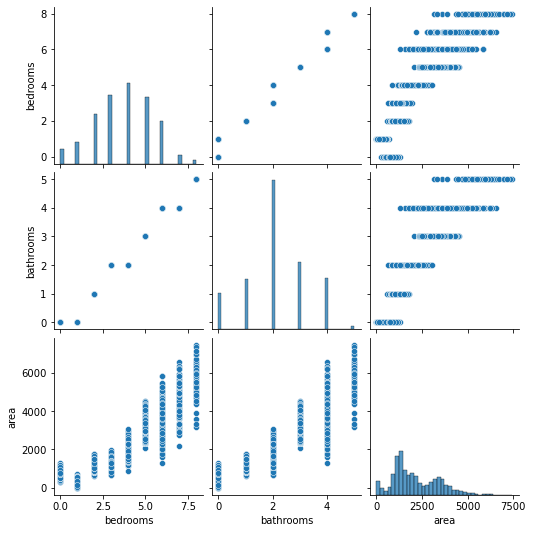

In [22]:
sns.pairplot(df[['bedrooms', 'bathrooms', 'area']]);

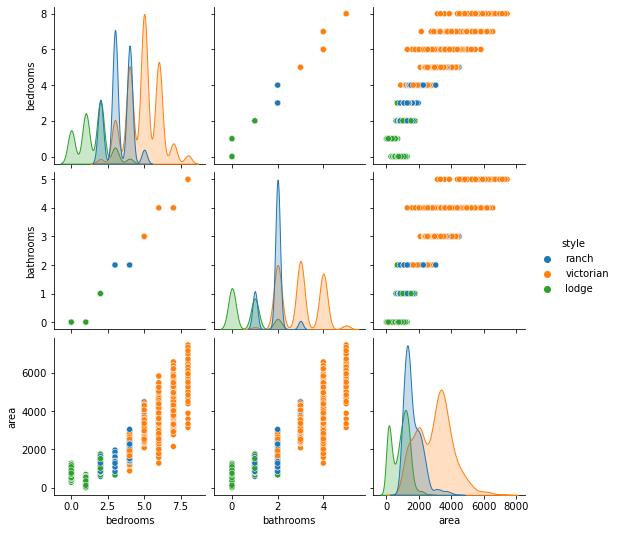

In [23]:
sns.pairplot(data=df, vars=['bedrooms', 'bathrooms', 'area'], hue="style");

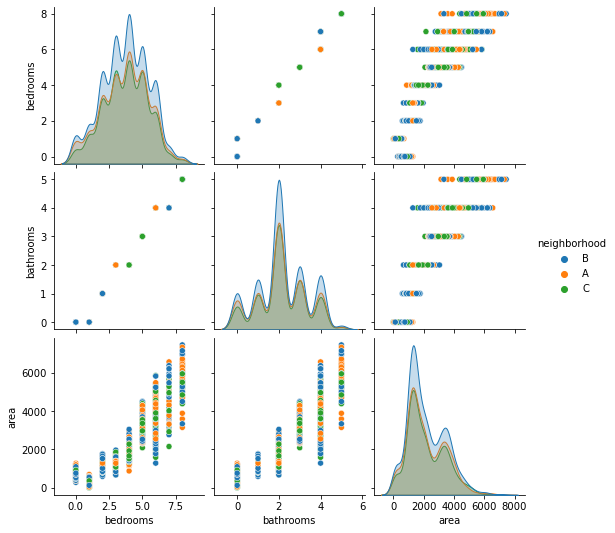

In [24]:
sns.pairplot(data=df, vars=['bedrooms', 'bathrooms', 'area'], hue="neighborhood");

It appers that the predictor variables (area, bedrooms and bathrooms are correlated with one another.
The variables that appear to be most correlated are the number of bedrooms and bathrooms.

`2.` Earlier, you fit linear models between each individual predictor variable and price, as well as using all of the variables and the price in a multiple linear regression model. Each of the individual models showed a positive relationship - that is, when bathrooms, bedrooms, or area increase, we predict the price of a home to increase. 

Fit a linear model to predict a home **price** using **bedrooms**, **bathrooms**, and **area**. Use the summary to answer the second quiz question below. **Don't forget an intercept.**

In [25]:
df['intercept'] = 1

lm = sm.OLS(df['price'], df[['intercept', 'area', 'bedrooms', 'bathrooms']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:30:27   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
area         345.9110      7.227     47.863      0.000     331.743     360.079
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

`3.` Calculate the VIFs for each variable in your model. [Here](https://etav.github.io/python/vif_factor_python.html) is the helpful post again, in case you need it!

In [26]:
y, X = dmatrices('price ~ area + bedrooms + bathrooms', df, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 

In [27]:
vif.head()

,VIF Factor,features
0,7.327102,Intercept
1,5.458190,area
2,20.854484,bedrooms
3,19.006851,bathrooms


`4.` Remove bathrooms from your above model.  Refit the multiple linear regression model and re-compute the VIFs.  Use the final quiz below to provide insights about your results.

In [28]:
df['intercept'] = 1

lm = sm.OLS(df['price'], df[['intercept', 'area', 'bedrooms']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     6345.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:30:28   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6025   BIC:                         1.691e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7857.4509   9425.288      0.834      0.405   -1.06e+04    2.63e+04
area         346.4458      7.152     48.443      0.000     332.426     360.466
bedrooms    1626.8306   5191.702      0.313      0.754   -8550.763    1.18e+04
==============================================================================
Omnibus:                      368.146   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.224
Skew:                           0.535   Prob(JB):                     8.91e-77
Kurtosis:                       2.502   Cond. No.                     6.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
y, X = dmatrices('price ~ area + bedrooms', df, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif.head()

,VIF Factor,features
0,6.063895,Intercept
1,5.345400,area
2,5.345400,bedrooms


After removing bathrooms, we can see that:
- All VIFs are now below 10
- All of the coefficients are now positive, as we would expect
- The R-squared value remained the same, suggesting we didn't really need both bedrooms and bathrooms in the model

## Quiz: Interpreting Model Coefficients
It is important that not only can you fit complex linear models, but that you then know which variables you can interpret. 

In this quiz, you will fit a few different models and use the quizzes below to match the appropriate interpretations to your coefficients when possible.

In some cases, the coefficients of your linear regression models wouldn't be kept due to the lack of significance. But that is not the aim of this notebook - **this notebook is strictly to assure you are comfortable with how to interpret coefficients when they are interpretable at all**.

In [30]:
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,intercept
0,1112,B,1188,3,2,ranch,598291,1
1,491,B,3512,5,3,victorian,1744259,1
2,5952,B,1134,3,2,ranch,571669,1
3,3525,A,1940,4,2,ranch,493675,1
4,5108,B,2208,6,4,victorian,1101539,1


### Model 1

`1.` For the first model, fit a model to predict `price` using `neighborhood`, `style`, and the `area` of the home.  Use the output to match the correct values to the corresponding interpretation in quiz 1 below.  Don't forget an intercept!  You will also need to build your dummy variables, and don't forget to drop one of the columns when you are fitting your linear model. It may be easiest to connect your interpretations to the values in the first quiz by creating the baselines as neighborhood C and home style **lodge**.

In [31]:
# intercept was created on a previous exercise!

# include neighborhood dummies
neighborhood_dummies = pd.get_dummies(df['neighborhood'])
df = df.join(neighborhood_dummies)
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,intercept,A,B,C
0,1112,B,1188,3,2,ranch,598291,1,0,1,0
1,491,B,3512,5,3,victorian,1744259,1,0,1,0
2,5952,B,1134,3,2,ranch,571669,1,0,1,0
3,3525,A,1940,4,2,ranch,493675,1,1,0,0
4,5108,B,2208,6,4,victorian,1101539,1,0,1,0


In [32]:
# include style dummies
style_dummies = pd.get_dummies(df['style'])
df = df.join(style_dummies)
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,intercept,A,B,C,lodge,ranch,victorian
0,1112,B,1188,3,2,ranch,598291,1,0,1,0,0,1,0
1,491,B,3512,5,3,victorian,1744259,1,0,1,0,0,0,1
2,5952,B,1134,3,2,ranch,571669,1,0,1,0,0,1,0
3,3525,A,1940,4,2,ranch,493675,1,1,0,0,0,1,0
4,5108,B,2208,6,4,victorian,1101539,1,0,1,0,0,0,1


In [33]:
# fit model
# baselines: NC and style lodge
lm = sm.OLS(df['price'], df[['intercept', 'area', 'A', 'B', 'ranch', 'victorian']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 1.372e+04
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:30:29   Log-Likelihood:                -80348.
No. Observations:                6028   AIC:                         1.607e+05
Df Residuals:                    6022   BIC:                         1.607e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.983e+05   5540.744    -35.791      0.000   -2.09e+05   -1.87e+05
area         348.7375      2.205    158.177      0.000     344.415     353.060
A           -194.2464   4965.459     -0.039      0.969   -9928.324    9539.832
B           5.243e+05   4687.484    111.844      0.000    5.15e+05    5.33e+05
ranch      -1974.7032   5757.527     -0.343      0.732   -1.33e+04    9312.111
victorian  -6262.7365   6893.293     -0.909      0.364   -1.98e+04    7250.586
==============================================================================
Omnibus:                      114.369   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.082
Skew:                           0.271   Prob(JB):                     6.29e-31
Kurtosis:                       3.509   Cond. No.                     1.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interpretation:
- The predicted difference in the price of a home in neighborhood in A as compared to neighborhood C, holding other variables constant: -194.25
- For every one unit increase in the area of a home, we predict the price of the home to increase by 348.74 (holding all other variables constant)
- The predicted home price if the home is a lodge in neighborhood C with an area of 0: - 198300
- The predicted difference in price between a victorian and lodge home, holding all other variables constant is: lodge is more expensive by 6262.73

Since there are no higher order terms, e.g. ${x^2}, {x^3}, xy$, the dummy variables and quantitative variables are interpreted same as always. 

A linear model with higher order terms could be represented as:

$$\hat{y} = b_0 + b_1x_1 + b_2{x^2_1} + b_3x_2 + b_4x_1x_2 $$

### Model 2

`2.` Now let's try a second model for predicting price.  This time, use `area` and `area squared` to predict price.  Also use the `style` of the home, but not `neighborhood` this time. You will again need to use your dummy variables, and add an intercept to the model. Use the results of your model to answer quiz questions 2 and 3.

In [34]:
# creating area squared column
df = df.assign(area_squared = lambda x: x.area **2)
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,intercept,A,B,C,lodge,ranch,victorian,area_squared
0,1112,B,1188,3,2,ranch,598291,1,0,1,0,0,1,0,1411344
1,491,B,3512,5,3,victorian,1744259,1,0,1,0,0,0,1,12334144
2,5952,B,1134,3,2,ranch,571669,1,0,1,0,0,1,0,1285956
3,3525,A,1940,4,2,ranch,493675,1,1,0,0,0,1,0,3763600
4,5108,B,2208,6,4,victorian,1101539,1,0,1,0,0,0,1,4875264


Note: documentation on [DataFrame.assign](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html).

In [35]:
# fit model
lm = sm.OLS(df['price'], df[['intercept', 'area', 'area_squared', 'ranch', 'victorian']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     3173.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:30:29   Log-Likelihood:                -84516.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6023   BIC:                         1.691e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept     1.855e+04   1.26e+04      1.467      0.142   -6229.316    4.33e+04
area           334.0146     13.525     24.696      0.000     307.501     360.528
area_squared     0.0029      0.002      1.283      0.199      -0.002       0.007
ranch         9917.2547   1.27e+04      0.781      0.435    -1.5e+04    3.48e+04
victorian     2509.3956   1.53e+04      0.164      0.870   -2.75e+04    3.25e+04
==============================================================================
Omnibus:                      375.220   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              340.688
Skew:                           0.519   Prob(JB):                     1.05e-74
Kurtosis:                       2.471   Cond. No.                     4.33e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.33e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interpretation:
- Based on the results, it doesn't seem useful to use area squared to fit this model. Its p-value alone suggest it isn't statistically significant.
- The predicted difference between the price of a ranch home and a lodge, holding all other variables constant is 9917.25. Since home style isn't associated with the higher order terms, the interpretation remains the same.
- However, interpreting area and area squared are not easily interpreted. 

In [36]:
# VIF (variance inflation factor) for this model
y, X = dmatrices('price ~ area + area_squared + ranch + victorian', df, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif.head()

,VIF Factor,features
0,10.903471,Intercept
1,19.118555,area
2,15.143776,area_squared
3,2.309260,ranch
4,3.988408,victorian


In [37]:
# VIF dropping area_squared
y, X = dmatrices('price ~ area + ranch + victorian', df, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif.head() # it would clearly be a better fit

,VIF Factor,features
0,5.858027,Intercept
1,2.024922,area
2,1.890060,ranch
3,3.231765,victorian


### Trying to find the best model

In [38]:
lm = sm.OLS(df['price'], df[['intercept', 'area', 'B']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 3.430e+04
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:30:30   Log-Likelihood:                -80348.
No. Observations:                6028   AIC:                         1.607e+05
Df Residuals:                    6025   BIC:                         1.607e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.989e+05   4128.454    -48.173      0.000   -2.07e+05   -1.91e+05
area         347.2235      1.549    224.154      0.000     344.187     350.260
B           5.244e+05   3908.331    134.169      0.000    5.17e+05    5.32e+05
==============================================================================
Omnibus:                      125.346   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.989
Skew:                           0.287   Prob(JB):                     6.01e-34
Kurtosis:                       3.528   Cond. No.                     6.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
# VIF for this model
y, X = dmatrices('price ~ area + B', df, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif.head()

,VIF Factor,features
0,4.639393,Intercept
1,1.000036,area
2,1.000036,B


Involving only these two variables would return a simplified model, while still predicting well (91.9%). Judging by the low VIFs, multicollinearity doesn't seem to be a problem in this model either!

Recap:

1. Build a **multiple linear regression** model in Python, which was actually very similar to what you did in the last lesson on simple linear regression.
2. Encode **dummy variables**, and interpret the **coefficients** attached to each.
3. Create and analyze **higher-order terms**, and how this impacts your ability to interpret coefficients.
4. Identify what it would mean for an **interaction** to be needed in a multiple linear regression model, as well as how to identify other higher-order terms. But again, these do make interpreting coefficients directly less of a priority and move your model towards one that, rather, aims to predict better at the expense of interpretation.
5. Evaluate **model assumptions** and understand **multicollinearity** and variance inflation factors (VIFs).